# Librerias

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import math

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

# Estilos de las gráfica
plt.style.use('bmh') #makes plots look pretty

# Preprocesado y modelado
# Sklearn
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, GridSearchCV, KFold, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, balanced_accuracy_score
from sklearn.metrics import recall_score, roc_curve, auc, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_moons
from sklearn import datasets
from sklearn.pipeline import make_pipeline

# Escalado de datos
from sklearn.preprocessing import scale

# Configuración ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import pingouin as pg #Correlación con intervalos de confianza
from scipy import stats
from scipy.stats import pearsonr
import scipy
import statsmodels.api as sm

# Procesamiento De datos

In [2]:
df1 = pd.read_excel('base_evaluada.xlsx')
df2 = pd.read_excel('entrenamiento_fraude.xlsx')
df3 = pd.read_excel('testeo_fraude.xlsx')

In [3]:
df4 = pd.merge(df1,df3, left_on="radicado",right_on="radicado") # junto los data set 
df4

,radicado,fraude_pred,mrc_cuenta_joven_ben,descri_apli_prod_ben,mrc_trx_cancelada,reincidencias_atasco_rec,diff_porc_solicli_devtira,marca_timeout,diff_porc_solicli_trxcli,vlrtran_A_act_dest_dest,...,mrc_cts_dest_ben_igual,canttrx_act_dest_rec,vlrtran_F_prom_lags_org_ben,vlrtran_B_act_dest_dest,hh_req,vlrtran_D_prom_act_dest_ben,vlrtran_G_prom_lags_org_ben,vlrtran_J_prom_lags_org_ben,vlrtran_prom_act_dest_rec,canttrx_E_lags_dest_ben
0,8011309964,NaN,1,AHORRO,0,8,20.0,NaN,2.000000,0.000000e+00,...,1,4,2.200000e+05,2937000,19,0.000000e+00,0.0,107516.931469,4.000000e+04,9
1,8011738625,NaN,0,NaN,0,1,20.0,NaN,2.000000,0.000000e+00,...,1,15,2.000000e+05,2937000,0,0.000000e+00,0.0,107516.931469,3.924000e+06,9
2,8011806283,NaN,0,AHORRO,0,0,20.0,-N,2.000000,6.609195e+08,...,0,70,5.007949e+05,2937000,0,0.000000e+00,0.0,260193.823514,1.212759e+05,9
3,8011679151,NaN,0,AHORRO,0,0,11.0,---,1.050000,0.000000e+00,...,1,4,7.750000e+05,119945900,0,0.000000e+00,0.0,107516.931469,4.000000e+04,9
4,8011772512,NaN,0,NaN,0,0,20.0,NaN,2.000000,1.798776e+09,...,1,4,2.000000e+05,2937000,0,1.033400e+06,0.0,107516.931469,4.000000e+04,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,8011441839,NaN,0,AHORRO,0,0,11.0,---,1.150000,0.000000e+00,...,0,57,1.241893e+06,72262000,0,1.638947e+06,0.0,107516.931469,8.738776e+05,51
1191,8011616454,NaN,0,AHORRO,0,0,20.0,-NN,2.000000,0.000000e+00,...,1,4,2.000000e+05,2937000,0,0.000000e+00,0.0,107516.931469,4.000000e+04,9
1192,8011535159,NaN,0,AHORRO,0,0,60.0,--N,1.980392,0.000000e+00,...,1,4,4.600000e+05,2937000,0,1.230000e+06,0.0,205752.431469,4.000000e+04,18
1193,8011507141,NaN,0,AHORRO,0,0,20.0,---,1.024142,0.000000e+00,...,0,15,3.850000e+05,10164000,0,0.000000e+00,0.0,217970.419336,2.200000e+05,20


In [4]:
df4=df4.fillna(0) # No puedo eliminar valores NaN, eliminaria filas. 
#Por lo que los voy a reemplzar por 0

In [5]:
df2=df2.fillna(0)

In [6]:
df2.describe().T#analizar las variables numericas y su comportamiento

,count,mean,std,min,25%,50%,75%,max
radicado,4778.0,8.011494e+09,1.858537e+05,8.011178e+09,8.011332e+09,8.011485e+09,8.011655e+09,8.011821e+09
fraude,4778.0,3.654249e-01,4.815995e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
mrc_cuenta_joven_ben,4778.0,3.725408e-02,1.894036e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
mrc_trx_cancelada,4778.0,1.883633e-02,1.359610e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
reincidencias_atasco_rec,4778.0,3.200084e-01,1.333746e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01
diff_porc_solicli_devtira,4778.0,3.236530e+03,1.499296e+05,1.000005e+01,2.000000e+01,2.000000e+01,2.000000e+01,7.990010e+06
diff_porc_solicli_trxcli,4778.0,5.528949e+03,1.255988e+05,1.000000e+00,1.400000e+00,2.000000e+00,2.000000e+00,7.200001e+06
vlrtran_A_act_dest_dest,4778.0,2.837421e+09,1.890374e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.425388e+11
canttrx_lags_org_0_ben,4778.0,2.213973e+03,5.966192e+03,8.170000e+02,8.180000e+02,1.349000e+03,2.429000e+03,2.012200e+05
mrc_dif_montos,4778.0,1.538301e-01,3.608235e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Analizo los valores con texto, la idea es asignarles un valor para poder identificar luego cuales son los valores más significativos en el data set. Luego se plantea el modelo para verificar que pueda funcionar correctamente

In [7]:
df2["descri_apli_prod_ben"].value_counts()

AHORRO       3306
0            1223
CORRIENTE     249
Name: descri_apli_prod_ben, dtype: int64

In [8]:
df2["marca_host_no_resp"].value_counts()

---    1325
-NN    1234
0      1044
--      598
--N     315
-XN     211
-N       49
N-N       2
Name: marca_host_no_resp, dtype: int64

In [9]:
df2["marca_timeout"].value_counts()

---    1325
-NN    1151
0      1044
--      597
--N     510
XNN      83
-N       49
-XN      16
N-N       2
X-        1
Name: marca_timeout, dtype: int64

In [10]:
d = {ni: indi for indi, ni in enumerate(set(df2["descri_apli_prod_ben"]))}#receta para asignar un número a cada valor único en una lista
numbers = [d[ni] for ni in df2["descri_apli_prod_ben"]]
df2["descri_apli_prod_ben"]=numbers

In [11]:
d = {ni: indi for indi, ni in enumerate(set(df2["marca_host_no_resp"]))}#receta para asignar un número a cada valor único en una lista
numbers = [d[ni] for ni in df2["marca_host_no_resp"]]
df2["marca_host_no_resp"]=numbers

In [12]:
d = {ni: indi for indi, ni in enumerate(set(df2["marca_timeout"]))}#receta para asignar un número a cada valor único en una lista
numbers = [d[ni] for ni in df2["marca_timeout"]]
df2["marca_timeout"]=numbers

In [13]:
df_entrenar=df2.drop(labels=['radicado', 'fraude'], axis=1)
df_entrenar

,mrc_cuenta_joven_ben,descri_apli_prod_ben,mrc_trx_cancelada,reincidencias_atasco_rec,diff_porc_solicli_devtira,marca_timeout,diff_porc_solicli_trxcli,vlrtran_A_act_dest_dest,marca_host_no_resp,canttrx_lags_org_0_ben,...,mrc_cts_dest_ben_igual,canttrx_act_dest_rec,vlrtran_F_prom_lags_org_ben,vlrtran_B_act_dest_dest,hh_req,vlrtran_D_prom_act_dest_ben,vlrtran_G_prom_lags_org_ben,vlrtran_J_prom_lags_org_ben,vlrtran_prom_act_dest_rec,canttrx_E_lags_dest_ben
0,0,0,0,0,20.000000,1,2.000000,0.000000e+00,1,1979,...,1,84,4.898089e+05,6787000.0,0,2.050000e+05,0.000000,9.430819e+05,96369.863014,21
1,0,1,0,0,20.000000,7,2.000000,0.000000e+00,5,818,...,1,4,2.000000e+05,2937000.0,0,0.000000e+00,0.000000,1.075169e+05,40000.000000,9
2,0,0,0,0,20.000000,1,2.000000,0.000000e+00,1,956,...,1,4,2.000000e+05,2937000.0,16,2.170000e+06,0.000000,1.236279e+06,40000.000000,24
3,0,0,0,0,20.000000,9,2.000000,0.000000e+00,7,818,...,0,4,2.000000e+05,2937000.0,0,0.000000e+00,0.000000,1.075169e+05,40000.000000,9
4,0,1,0,0,127.428571,7,2.000000,1.978000e+08,5,818,...,1,4,2.000000e+05,2937000.0,0,3.044333e+06,0.000000,1.075169e+05,40000.000000,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,0,1,0,0,11.000000,7,1.133333,0.000000e+00,5,817,...,1,4,2.000000e+05,2937000.0,9,0.000000e+00,0.000000,1.075169e+05,40000.000000,9
4774,0,1,0,0,20.000000,0,1.990519,4.548744e+09,0,818,...,1,4,2.000000e+05,362043123.0,12,2.499747e+06,0.000000,1.075169e+05,40000.000000,866
4775,0,0,0,0,20.000000,0,2.000000,0.000000e+00,0,1363,...,0,4,1.865385e+06,4037000.0,0,0.000000e+00,0.000000,1.075169e+05,40000.000000,15
4776,0,0,0,0,20.000000,1,2.000000,0.000000e+00,1,992,...,1,133,3.019608e+05,8261000.0,0,0.000000e+00,93448.352273,1.075169e+05,176894.736842,57


# Modelo

In [14]:
X = df_entrenar
Y = df2['fraude']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train) #se entrena el modelo
print(rfc.score(X_test,y_test)) # se mustra el puntaje 
pred = rfc.predict(df_entrenar)


0.8253138075313807


In [15]:
pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

Se hace un modelo de randoforestclassifier para determinar en este caso use todas las variables para ejecutar el modelo, las variables Object las converti a valores númericas para que se pudiera entrenar por completo el modelo. El modelo se puede entrenar con menos variables pero eso implicaria conocer a fondo todas las variables que peso le puede dar al modelo. Con un metodo de correlacion se pueden verificar que variables tienen mayor peso con respecto a la que se desea analizar que en este caso es fraude. Tambien es posible usar un diagrama de calor para determinar cuales tiene menos relaciones entre sí. 

In [16]:
df2.corr()

,radicado,fraude,mrc_cuenta_joven_ben,descri_apli_prod_ben,mrc_trx_cancelada,reincidencias_atasco_rec,diff_porc_solicli_devtira,marca_timeout,diff_porc_solicli_trxcli,vlrtran_A_act_dest_dest,...,mrc_cts_dest_ben_igual,canttrx_act_dest_rec,vlrtran_F_prom_lags_org_ben,vlrtran_B_act_dest_dest,hh_req,vlrtran_D_prom_act_dest_ben,vlrtran_G_prom_lags_org_ben,vlrtran_J_prom_lags_org_ben,vlrtran_prom_act_dest_rec,canttrx_E_lags_dest_ben
radicado,1.000000,-0.009116,-0.043265,-0.009907,-0.031511,-0.001434,0.004060,-0.035907,0.026686,-0.021963,...,0.003966,-0.012162,0.048570,-0.016576,-0.773983,0.026708,0.000476,0.016600,0.022280,0.000901
fraude,-0.009116,1.000000,0.201850,0.254008,0.182587,0.215833,0.028018,0.000053,0.027546,-0.040583,...,0.007418,-0.002759,-0.103430,-0.015929,-0.000301,0.014722,-0.019516,-0.013216,-0.011759,0.057092
mrc_cuenta_joven_ben,-0.043265,0.201850,1.000000,-0.118655,0.078422,0.154165,-0.001858,0.009697,-0.002484,0.012926,...,-0.020764,-0.033163,-0.078467,-0.008036,0.042231,-0.057154,0.002258,-0.005254,-0.003885,-0.019044
descri_apli_prod_ben,-0.009907,0.254008,-0.118655,1.000000,-0.014416,0.039678,-0.013225,-0.053202,-0.009327,0.073097,...,0.034027,-0.014425,-0.260257,-0.000862,-0.006790,0.119762,-0.102336,-0.011971,-0.009627,0.106543
mrc_trx_cancelada,-0.031511,0.182587,0.078422,-0.014416,1.000000,-0.024012,-0.002958,-0.092067,-0.004874,-0.020795,...,0.014753,0.048747,-0.012282,-0.002372,0.043126,-0.035845,0.008327,0.004547,-0.002035,-0.013351
reincidencias_atasco_rec,-0.001434,0.215833,0.154165,0.039678,-0.024012,1.000000,-0.005087,-0.004475,-0.009029,-0.001278,...,0.058146,-0.012916,-0.052079,0.004562,-0.001330,-0.003726,0.019749,-0.004555,-0.003999,0.001508
diff_porc_solicli_devtira,0.004060,0.028018,-0.001858,-0.013225,-0.002958,-0.005087,1.000000,0.028132,0.016196,-0.003197,...,-0.021885,0.000259,0.021697,-0.001474,-0.014666,-0.008670,-0.003558,-0.000604,-0.000446,-0.002070
marca_timeout,-0.035907,0.000053,0.009697,-0.053202,-0.092067,-0.004475,0.028132,1.000000,-0.028186,0.086605,...,-0.291471,-0.034169,-0.003579,-0.035140,0.033508,0.022003,0.032011,-0.011645,-0.012146,0.071876
diff_porc_solicli_trxcli,0.026686,0.027546,-0.002484,-0.009327,-0.004874,-0.009029,0.016196,-0.028186,1.000000,-0.003789,...,-0.034200,-0.001652,0.013156,-0.002928,-0.024026,-0.011087,-0.007100,-0.000477,-0.000919,-0.004174
vlrtran_A_act_dest_dest,-0.021963,-0.040583,0.012926,0.073097,-0.020795,-0.001278,-0.003197,0.086605,-0.003789,1.000000,...,-0.050176,-0.024416,-0.052471,-0.008306,0.014463,0.052005,0.012013,-0.004010,-0.002756,0.141329


Todos los valores son muy cercanos a 0 por lo que tiene relaciones nulas o muy debiles 

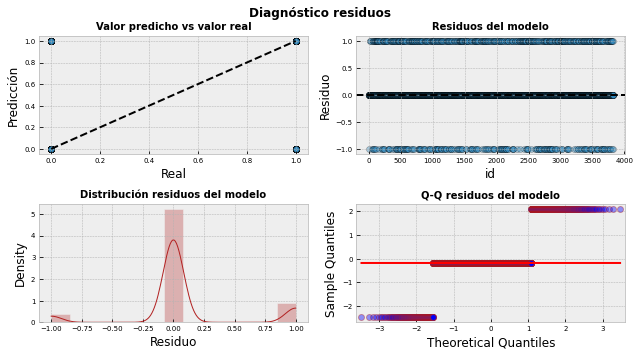

In [17]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = rfc,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [18]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = rfc,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -0.43560167337661065


In [19]:
# neg_root_mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

predicciones = rfc.predict(X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

0.4179547732334436

El error cuadrático medio (RMSE) mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido. Cuanto más pequeño es un valor RMSE, más cercanos son los valores predichos y observados.

# Entrenar los datos 

Para el que el dataset testeo_fraude pueda ser entrenado se debe proceder a hacer la limpiza de datos.

In [20]:
df3=df3.fillna(0)

In [21]:
d = {ni: indi for indi, ni in enumerate(set(df3["descri_apli_prod_ben"]))}#receta para asignar un número a cada valor único en una lista
numbers = [d[ni] for ni in df3["descri_apli_prod_ben"]]
df3["descri_apli_prod_ben"]=numbers

In [22]:
d = {ni: indi for indi, ni in enumerate(set(df3["marca_host_no_resp"]))}#receta para asignar un número a cada valor único en una lista
numbers = [d[ni] for ni in df3["marca_host_no_resp"]]
df3["marca_host_no_resp"]=numbers

In [23]:
d = {ni: indi for indi, ni in enumerate(set(df3["marca_timeout"]))}#receta para asignar un número a cada valor único en una lista
numbers = [d[ni] for ni in df3["marca_timeout"]]
df3["marca_timeout"]=numbers

In [24]:
df_entrenar1 = df3.drop(labels=['radicado'], axis=1)

In [25]:
pred_datos = rfc.predict(df_entrenar1)

In [26]:
type(pred_datos)

numpy.ndarray

In [30]:
df1=df1.fillna(0)

In [42]:
dft = pd.DataFrame(df1)

In [46]:
dft.columns = dft.columns.str.strip()

Se usa esto porque al parecer farude_pred no tiene atributos, se usa este metodo que perimte deshacerse del error.
De otro modo lo más conveniente es cambiar el nombre directamente desde el excel

In [49]:
dft['fraude_pred'] = pred_datos

In [50]:
dft

,radicado,fraude_pred
0,8011309964,1
1,8011738625,1
2,8011806283,0
3,8011679151,0
4,8011772512,1
...,...,...
1190,8011441839,0
1191,8011616454,0
1192,8011535159,0
1193,8011507141,0


Con esto se deja entrenado donde el valor 1 es fraude y el valor 0 es no fraude

In [51]:
dft = dft.to_excel('base_evaluada1.xlsx')